In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import zipfile
import os

# Path to the zip file (Adjust as per your Google Drive structure)
zip_path = '/content/drive/MyDrive/AML Mod 13 data/archive 5.49.00 PM.zip'

# Destination folder where the zip file will be extracted
extract_to = '/content/sample_data/'

# Unzipping the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)


In [3]:
# Question1

import os
import cv2
import numpy as np

IMGSIZE = (128, 128)
CNAMES = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

# Define paths for training and testing data
base_path = extract_to
train_path = os.path.join(base_path, 'seg_train/seg_train/')
test_path = os.path.join(base_path, 'seg_test/seg_test/')

X_tr, y_tr = [], []
X_ts, y_ts = [], []

# Load training data
for label in CNAMES:
    path = train_path + label
    for f in sorted([_ for _ in os.listdir(path) if _.lower().endswith('.jpg')]):
        img = cv2.imread(os.path.join(path, f))
        img_resized = cv2.resize(img, IMGSIZE)
        X_tr.append(img_resized)
        y_tr.append(CNAMES.index(label))

# Convert lists to numpy arrays
X_tr = np.array(X_tr)
y_tr = np.array(y_tr)

# Load test data
X_ts, y_ts = [], []
for label in CNAMES:
    path = test_path + label
    for f in sorted([_ for _ in os.listdir(path) if _.lower().endswith('.jpg')]):
        img = cv2.imread(os.path.join(path, f))
        img_resized = cv2.resize(img, IMGSIZE)
        X_ts.append(img_resized)
        y_ts.append(CNAMES.index(label))

# Convert lists to numpy arrays
X_ts = np.array(X_ts)
y_ts = np.array(y_ts)


Displaying training images:


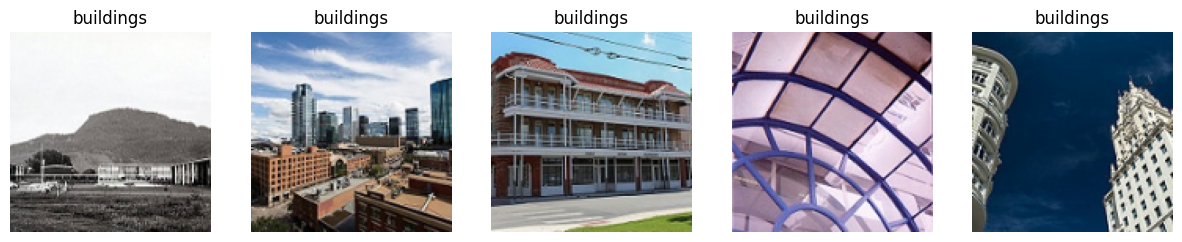

Shape of an image: (128, 128, 3)
There are 3 color channels (RGB/BGR).
Displaying test images:


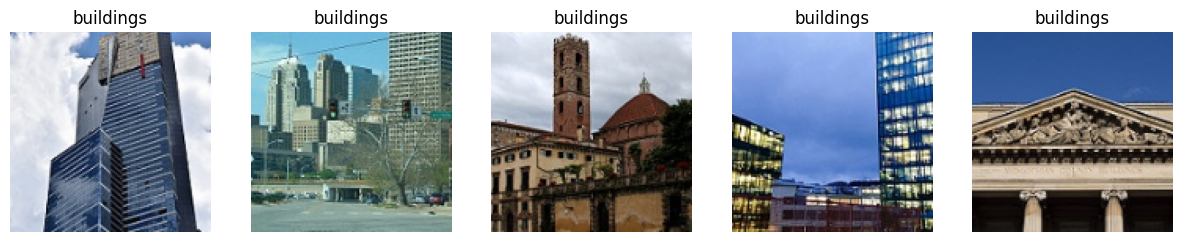

Shape of an image: (128, 128, 3)
There are 3 color channels (RGB/BGR).


In [4]:
# Question 1

import matplotlib.pyplot as plt

def display_images_and_channels(images, labels, num_images=5):
    plt.figure(figsize=(15, 3))
    for i in range(num_images):
        ax = plt.subplot(1, num_images, i + 1)
        # OpenCV reads an image in BGR format, so convert it to RGB
        img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.title(labels[i])
        plt.axis("off")
    plt.show()

    # Display the shape of the first image to show the number of color channels
    print(f"Shape of an image: {images[0].shape}")
    if images[0].shape[-1] == 3:
        print("There are 3 color channels (RGB/BGR).")
    else:
        print("Number of color channels is unusual: ", images[0].shape[-1])

# Convert indices back to category names for display
label_names_tr = [CNAMES[i] for i in y_tr]
label_names_ts = [CNAMES[i] for i in y_ts]

# Display some images from the training set
print("Displaying training images:")
display_images_and_channels(X_tr, label_names_tr)

# Display some images from the test set
print("Displaying test images:")
display_images_and_channels(X_ts, label_names_ts)


In [5]:
# Question 2

# Convert the lists to numpy arrays
X_tr = np.array(X_tr, dtype=np.float32)
X_ts = np.array(X_ts, dtype=np.float32)

# Scale the images to the [0, 1] range
X_tr /= 255.0
X_ts /= 255.0

# Print the shape of the training data to confirm correct dimensions
print("Shape of training data:", X_tr.shape)
print("Shape of test data:", X_ts.shape)


Shape of training data: (14034, 128, 128, 3)
Shape of test data: (3000, 128, 128, 3)


In [6]:
# Question 3

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128*128*3, 50)  # Input layer flattening the 128x128x3 image
        self.fc2 = nn.Linear(50, 50)         # First hidden layer
        self.fc3 = nn.Linear(50, 50)         # Second hidden layer
        self.fc4 = nn.Linear(50, 6)          # Output layer with 6 classes

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [7]:
# Question 3

# Convert data to tensors
X_tr_t = torch.tensor(X_tr)
y_tr_t = torch.tensor(y_tr, dtype=torch.long)
X_ts_t = torch.tensor(X_ts)
y_ts_t = torch.tensor(y_ts, dtype=torch.long)

# Create datasets and loaders
train_dataset = TensorDataset(X_tr_t, y_tr_t)
test_dataset = TensorDataset(X_ts_t, y_ts_t)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [8]:
# Question 3

model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
# Question 3

def train_model(model, train_loader, optimizer, criterion, num_epochs=200):
    model.train()
    for epoch in range(num_epochs):
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}/{num_epochs} completed.')

train_model(model, train_loader, optimizer, criterion)


Epoch 1/200 completed.
Epoch 2/200 completed.
Epoch 3/200 completed.
Epoch 4/200 completed.
Epoch 5/200 completed.
Epoch 6/200 completed.
Epoch 7/200 completed.
Epoch 8/200 completed.
Epoch 9/200 completed.
Epoch 10/200 completed.
Epoch 11/200 completed.
Epoch 12/200 completed.
Epoch 13/200 completed.
Epoch 14/200 completed.
Epoch 15/200 completed.
Epoch 16/200 completed.
Epoch 17/200 completed.
Epoch 18/200 completed.
Epoch 19/200 completed.
Epoch 20/200 completed.
Epoch 21/200 completed.
Epoch 22/200 completed.
Epoch 23/200 completed.
Epoch 24/200 completed.
Epoch 25/200 completed.
Epoch 26/200 completed.
Epoch 27/200 completed.
Epoch 28/200 completed.
Epoch 29/200 completed.
Epoch 30/200 completed.
Epoch 31/200 completed.
Epoch 32/200 completed.
Epoch 33/200 completed.
Epoch 34/200 completed.
Epoch 35/200 completed.
Epoch 36/200 completed.
Epoch 37/200 completed.
Epoch 38/200 completed.
Epoch 39/200 completed.
Epoch 40/200 completed.
Epoch 41/200 completed.
Epoch 42/200 completed.
E

In [10]:
# Question 3

def evaluate_model(model, test_loader):
    model.eval()
    total = correct = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy}%')

evaluate_model(model, test_loader)

Test Accuracy: 52.93333333333333%


### Question 4

### Improved Neural Network Model Approach:

1. **Data Handling Improvements:**
   - **Augmentation:** Increase the robustness of the model to variations in input data by implementing image augmentation techniques such as rotations, translations, scaling, flips, and color adjustments.
   - **Normalization:** Ensure all input images are normalized to have a consistent scale. This aids the convergence during training by providing numerical stability.

2. **Model Architecture Enhancements:**
   - **Deepen the Network:** Adding more layers can help the network learn more complex patterns, but be aware of overfitting.
   - **Widen the Layers:** Increasing the number of units in each layer can provide more capacity to the model.
   - **Advanced Layers:** Incorporate batch normalization and dropout layers to improve training dynamics and mitigate overfitting.

3. **Regularization Techniques:**
   - **Dropout:** Introduce dropout layers to randomly drop units during training to prevent overdependence on any single neuron, promoting better generalization.
   - **L2 Regularization:** Add L2 weight regularization to penalize large weights, encouraging simpler models that may generalize better.

4. **Optimization Techniques:**
   - **Learning Rate Adjustment:** Implement learning rate schedules or adaptive learning rate methods to fine-tune the training process over time.
   - **Optimizer Selection:** Experiment with different optimizers like SGD with momentum, RMSprop, or Adam, which may offer better performance depending on the problem.

5. **Training Techniques:**
   - **Early Stopping:** Monitor validation performance during training and stop training when performance degrades or ceases to improve significantly.
   - **Batch Size Variation:** Experiment with different batch sizes to find the optimal size for training stability and performance.

6. **Hyperparameter Tuning:**
   - **Systematic Search:** Use grid search or random search to explore combinations of hyperparameters systematically.
   - **Automated Hyperparameter Tuning:** Consider using tools like Ray Tune or Hyperopt to automate the search for optimal hyperparameters.

7. **Evaluation and Metrics:**
   - **Cross-Validation:** Use k-fold cross-validation to assess how the network's model generalizes to an independent data set.
   - **Performance Metrics:** Ensure the use of appropriate metrics for evaluation, such as accuracy, precision, recall, F1 score, especially if dealing with imbalanced classes.
